# Furijeove transformacije $-$ obrada zvuka

U ovom primeru ćemo raditi sa zvučnim signalom i upoznati se sa tehnikom kreiranja spektrograma, jedinstvenog zvučnog zapisa. 

In [1]:
from IPython import display
from scipy.io import wavfile

In [2]:
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt

Koristeći audio funkcionalnosti Jupyter sveski, poslušajmo najpre *bonobo.wav* snimak koji ćemo koristiti u radu.

In [3]:
display.Audio(url='data/bonobo.wav')

Dalje ćemo pročitati podatke sadržane u ovaj audio datoteci korišenjem funkcije `read` paketa `wavfile`. Rezultat čitanja su frekvencija uzorkovanja i sami uzorci. 

In [4]:
Fs, data = wavfile.read('data/bonobo.wav')

In [5]:
print('Frekvencija uzorkovanja: ', Fs)
print('Uzorci: ', data.shape)

Frekvencija uzorkovanja:  44100
Uzorci:  (1323000, 2)


Iz forme pročitanih audio uzoraka možemo da zaključimo da je u pitanju dvokanalni stereo zvuk. Možemo odrediti aritmetičku sredinu uzoraka kako bismo dobili jednodimenzioni signal. 

In [6]:
data = data.mean(axis=1)

In [7]:
print('Uzorci: ', data.shape)

Uzorci:  (1323000,)


Broj uzoraka ćemo obeležiti sa $N$.

In [8]:
N = data.shape[0]

Možemo dalje da odredimo ukupno trajanje audio snimka.

In [9]:
duration = N / Fs
duration

30.0

Pošto su audio zapisi bogati frekvencijama, razmotrimo kako se zvuk ponaša u prvih pola sekunde. 

Odredimo najpre broj uzoraka u prvih pola sekunde i izdojimo ih.

In [10]:
n = Fs // 2
sample = data[:n]

Potom prikažimo spektar magnituda.

In [11]:
c = fft.fft(sample)
freq = fft.fftfreq(n, 1.0/Fs)

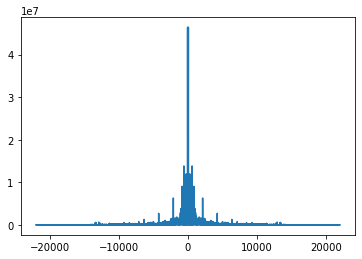

In [12]:
plt.plot(freq, np.abs(c))
plt.show()

Možemo dalje redukovati skup frekvencija na interval $(0, 1000)$. To možemo postići kreiranjem odgovarajuće maske i izborom odgovarajućih koeficijenata i frekvencija.

In [13]:
mask = (freq > 0) * (freq < 1000)
c_filtered = c[mask]
freq_filtered = freq[mask]

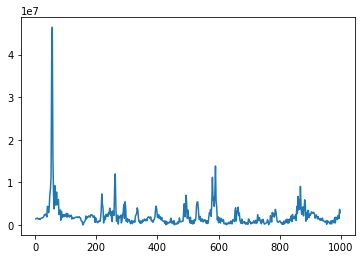

In [14]:
plt.plot(freq_filtered, np.abs(c_filtered))
plt.show()

### Prozorske funkcije

Pre nego li kreiramo spektrogram, uvedimo pojam prozorskih funkcija (eng. *window functions*). Ove funkcije obično imaju formu zvona i primarni cilj da pojačaju i unaprede vrednosti signala. Kako na krajevima intervala prozorske funkcije uzimaju vrednosti bliske nulama, mogu preduprediti problem curenja spektra koji nastaje prilikom rada sa signalima koji nisu periodični. Na nivou paketa `signal` podržane su Blakmanova, Hanova, Hamingova i mnoge druge prozorske funkcije.

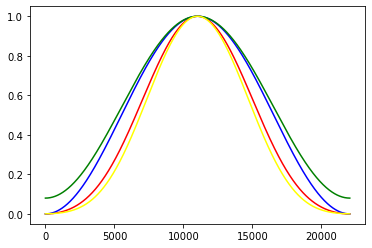

In [15]:
from scipy import signal

plt.plot(np.arange(0,n), signal.windows.blackman(n), color='red')
plt.plot(np.arange(0,n), signal.windows.hann(n), color='blue')
plt.plot(np.arange(0,n), signal.windows.hamming(n), color='green')
# promeniti parametar Kajzerove funkcije i videti kako se signal ponasa
plt.plot(np.arange(0,n), signal.windows.kaiser(n, 10), color='yellow')
plt.show()

Za naš primer ćemo uzeti npr. Kajzerovu prozorsku funkciju sa parametrom 5.

In [16]:
window = signal.windows.kaiser(n, 5)

### Spektrogram

Sada ćemo kreirati spektrogram. Spektrogram predstavlja vizuelnu reprezantaciju zvučnog signala u frekvencijskom domenu. Ovde će on biti predstavljen matricom čiji broj redova odgovara broju isečaka dužine 0.5 i onoliko kolona koliko ima frekvencija frekvencijskog domena koje se prate. 

In [17]:
sp_frequencies = freq_filtered.shape[0]
sp_time = int(duration // 0.5)
spectrogram = np.zeros((sp_time, sp_frequencies))
spectrogram.shape

(60, 499)

Prethodno smo razmotrili frekvencijsku strukturi zvučnog zapisa u prvih 0.5 sekundi. Sada ćemo proći kroz sve vremenske isečke dužine 0.5 sekundi i nad njima ponoviti opisani postupak tj. popraviti signal prozorskom funkcijom, primeniti Furijeovu transformaciju, izračunati vrednosti magnituda, a zatim ih i sačuvati u spektrogramu.

In [18]:
for i in range(0, sp_time):
    samples = data[i*n : (i+1)*n]
    c = fft.fft(samples* window) 
    c_filtered = c[mask]
    values = np.log(np.abs(c_filtered))
    spectrogram[i, :] = values

Prikažimo sada spektrogram.

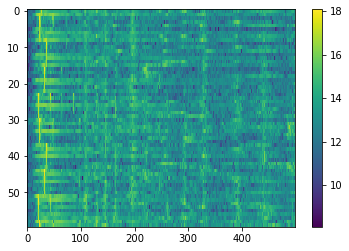

In [19]:
plt.imshow(spectrogram, aspect='auto')
plt.colorbar()
plt.show()

Pošto se spektrogrami jako često koriste u obradi zvuka, postoji i ugrađena bibliotečka podrška preko funkcije `spectrogram`. Povratne vrednosti funkcije su: niz frekvencija prisutnih u zapisu (f), niz vremena koji određuje segmente (t) i vrednosti spektrograma (s).

In [20]:
f, t, s = signal.spectrogram(data, Fs)

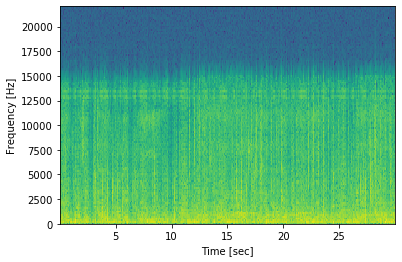

In [21]:
plt.pcolormesh(t, f, np.log(s))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()